# Segmentez des clients d'un site e-commerce 


Etude data - Projet 5 - Nalron (Décembre 2020) OpenClassrooms / CentraleSupélec

Traitement des données sur Jupyter Notebook (Distribution Anaconda)

Etude réalisée en langage Python

*Data source* : [Base de données anonymisée](https://www.kaggle.com/olistbr/brazilian-ecommerce)

---

### Olist une solution de vente sur les marketplaces en ligne.
La page d'accueil du site [Olist](https://olist.com/)…
![](p5_00_image/olist_homepage.png)

**Olist** souhaite fournir à ses équipes d'e-commerce une **segmentation des clients** qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.

L'objectif est de **comprendre les différents types d’utilisateurs** grâce à leur comportement et à leurs données personnelles.

L’équipe marketing est dans l'attente d'une **description actionable** par sa segmentation et sa logique sous-jacente pour une utilisation optimale, ainsi qu’une **proposition de contrat de maintenance** basée sur une analyse de la stabilité des segments au cours du temps.

### Les données mises à disposition 
Pour cette mission, Olist va fournir une [base de données anonymisée](https://www.kaggle.com/olistbr/brazilian-ecommerce) comportant des informations sur l’historique de commandes, les produits achetés, les commentaires de satisfaction, et la localisation des clients depuis septembre 2016.

### Mission
Aider les équipes d’Olist à comprendre les différents types d'utilisateurs. Utiliser des méthodes non supervisées pour regrouper ensemble des clients de profils similaires. Ces catégories pourront être utilisées par l’équipe marketing pour mieux communiquer.

``Pour des raisons de confidentialité, Olist ne fournit pas beaucoup de données, il est donc nécessaire de fouiller dans celles disponibles afin de créer les meilleures features pour les exploiter.``


**Spécifications Olist :**
- La segmentation proposée doit être exploitable et facile d’utilisation pour l’équipe marketing.
- Evaluer la fréquence à laquelle la segmentation doit être mise à jour, afin de pouvoir effectuer un devis de contrat de maintenance.
- Le code fourni doit respecter la convention PEP8, pour être utilisable par Olist.

---

In [1]:
import pandas as pd
import seaborn as sns
import pickle
from zipfile import ZipFile
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
pd.options.display.max_rows = 150
pd.options.display.max_columns = 150
plt.style.use('ggplot') 
plt.rcParams.update(
    {
     'figure.figsize': (15, 10),
     'axes.labelsize': 15,
     'axes.titlesize':25,
     'xtick.labelsize':15,
     'ytick.labelsize':15,
     'axes.titleweight':'bold',
     'axes.titleweight':'bold'
    })

In [4]:
#Checklist bdd (.zip files)
foldername = ZipFile("p5_00_data.zip").namelist()
foldername = [line for line in foldername if "MACOSX" not in line]
foldername = [line for line in foldername if ".csv" in line]
display(foldername)
print("> la base de données contient " + str(len(foldername)) + " fichiers compressés car assez volumineux")

['p5_00_data/olist_sellers_dataset.csv',
 'p5_00_data/product_category_name_translation.csv',
 'p5_00_data/olist_orders_dataset.csv',
 'p5_00_data/olist_order_items_dataset.csv',
 'p5_00_data/olist_customers_dataset.csv',
 'p5_00_data/olist_geolocation_dataset.csv',
 'p5_00_data/olist_order_payments_dataset.csv',
 'p5_00_data/olist_order_reviews_dataset.csv',
 'p5_00_data/olist_products_dataset.csv']

> la base de données contient 9 fichiers compressés car assez volumineux


In [5]:
#Folder access
data_folder = ZipFile("p5_00_data.zip")

files_dict = {
    'customers': 'p5_00_data/olist_customers_dataset.csv',
    'geolocation': 'p5_00_data/olist_geolocation_dataset.csv',
    'sellers': 'p5_00_data/olist_sellers_dataset.csv',
    'products': 'p5_00_data/olist_products_dataset.csv',
    'product_category': 'p5_00_data/product_category_name_translation.csv',
    'orders': 'p5_00_data/olist_orders_dataset.csv',
    'orders_items': 'p5_00_data/olist_order_items_dataset.csv',
    'order_payments': 'p5_00_data/olist_order_payments_dataset.csv',
    'order_reviews': 'p5_00_data/olist_order_reviews_dataset.csv'
}

In [6]:
#Summary table
def data_describe(zipfile):
    '''Check the number of rows, columns, missing values and duplicates.
       Count type of columns.
       Memory indication'''
    
    data_dict = {}
    for name, file in files_dict.items():
        data = pd.read_csv(zipfile.open(file))
        data_dict[name] = [data.shape[0], 
                           data.shape[1],
                           round(data.isna().sum().sum()/data.size*100, 2),
                           round(data.duplicated().sum().sum()/data.size*100, 2),
                           data.select_dtypes(include=['object']).shape[1],
                           data.select_dtypes(include=['float']).shape[1],
                           data.select_dtypes(include=['int']).shape[1],
                           data.select_dtypes(include=['bool']).shape[1],
                           round(data.memory_usage().sum()/1024**2, 3)]

    comparative_table = pd.DataFrame.from_dict(data = data_dict, 
                                               columns = ['Rows', 'Columns', '%NaN', '%Duplicate', 
                                                          'object_dtype','float_dtype', 'int_dtype', 
                                                          'bool_dtype', 'MB_Memory'], 
                                               orient='index')
    
    return comparative_table

print('Comparative data table')
data_describe(data_folder)

Comparative data table


,Rows,Columns,%NaN,%Duplicate,object_dtype,float_dtype,int_dtype,bool_dtype,MB_Memory
customers,99441,5,0.00,0.00,4,0,1,0,3.793
geolocation,1000163,5,0.00,5.24,2,2,1,0,38.153
sellers,3095,4,0.00,0.00,3,0,1,0,0.095
products,32951,9,0.83,0.00,2,7,0,0,2.263
product_category,71,2,0.00,0.00,2,0,0,0,0.001
orders,99441,8,0.62,0.00,8,0,0,0,6.070
orders_items,112650,7,0.00,0.00,4,2,1,0,6.016
order_payments,103886,5,0.00,0.00,2,1,2,0,3.963
order_reviews,100000,7,20.93,0.00,6,0,1,0,5.341


In [7]:
def features(zipfile):
    '''Comparative data with missing values, 
       and many descriptive statistics.'''
    
    data_object = {}
    data_numeric = {}
    
    for name, file in files_dict.items():
        data = pd.read_csv(zipfile.open(file))
        
        data_object[name] = [(x, data[x].dtype, 
                              data[x].isna().sum().sum(),
                              int(data[x].count())) for x in data.select_dtypes(exclude=['int', 'float'])]
        
        data_numeric[name] = [(x, data[x].dtype, 
                               int(data[x].isna().sum().sum()), 
                               int(data[x].count()), 
                               int(data[x].mean()), 
                               round(data[x].std(),1),
                               round(data[x].min(),1), 
                               round(data[x].max(),1)) for x in data.select_dtypes(exclude='object')]
        

    comparative_object = pd.DataFrame.from_dict(data = data_object, orient='index')
    dict_of_object = {name: pd.DataFrame(file) for name,file in data_object.items()}
    df1 = pd.concat(dict_of_object, axis=0)
    df1.columns=['features','dtype','nan','count']
    
    comparative_numeric = pd.DataFrame.from_dict(data = data_numeric, orient='index')
    dict_of_numeric = {name: pd.DataFrame(file) for name,file in data_numeric.items()}
    df2 = pd.concat(dict_of_numeric, axis=0)
    df2.columns=['features','dtype','nan','count', 'mean', 'std', 'min','max']
        
    return df1, df2

In [8]:
#Comparative features 
print('Comparative data type numeric')
display(features(data_folder)[1])

Comparative data type numeric


features    dtype    nan      count  \
customers      0     customer_zip_code_prefix    int64    0.0    99441.0   
geolocation    0  geolocation_zip_code_prefix    int64    0.0  1000163.0   
               1              geolocation_lat  float64    0.0  1000163.0   
               2              geolocation_lng  float64    0.0  1000163.0   
sellers        0       seller_zip_code_prefix    int64    0.0     3095.0   
products       0          product_name_lenght  float64  610.0    32341.0   
               1   product_description_lenght  float64  610.0    32341.0   
               2           product_photos_qty  float64  610.0    32341.0   
               3             product_weight_g  float64    2.0    32949.0   
               4            product_length_cm  float64    2.0    32949.0   
               5            product_height_cm  float64    2.0    32949.0   
               6             product_width_cm  float64    2.0    32949.0   
orders_items   0                order_item_id    int64    0.0   112650.0   
               1                        price  float64    0.0   112650.0   
               2                freight_value  float64    0.0   112650.0   
order_payments 0           payment_sequential    int64    0.0   103886.0   
               1         payment_installments    int64    0.0   103886.0   
               2                payment_value  float64    0.0   103886.0   
order_reviews  0                 review_score    int64    0.0   100000.0   

                     mean      std     min      max  
customers      0  35137.0  29797.9  1003.0  99990.0  
geolocation    0  36574.0  30549.3  1001.0  99990.0  
               1    -21.0      5.7   -36.6     45.1  
               2    -46.0      4.3  -101.5    121.1  
sellers        0  32291.0  32713.5  1001.0  99730.0  
products       0     48.0     10.2     5.0     76.0  
               1    771.0    635.1     4.0   3992.0  
               2      2.0      1.7     1.0     20.0  
               3   2276.0   4282.0     0.0  40425.0  
               4     30.0     16.9     7.0    105.0  
               5     16.0     13.6     2.0    105.0  
               6     23.0     12.1     6.0    118.0  
orders_items   0      1.0      0.7     1.0     21.0  
               1    120.0    183.6     0.8   6735.0  
               2     19.0     15.8     0.0    409.7  
order_payments 0      1.0      0.7     1.0     29.0  
               1      2.0      2.7     0.0     24.0  
               2    154.0    217.5     0.0  13664.1  
order_reviews  0      4.0      1.4     1.0      5.0

In [9]:
print('Comparative data type object')
display(features(data_folder)[0])

Comparative data type object


features   dtype    nan    count
customers        0                    customer_id  object      0    99441
                 1             customer_unique_id  object      0    99441
                 2                  customer_city  object      0    99441
                 3                 customer_state  object      0    99441
geolocation      0               geolocation_city  object      0  1000163
                 1              geolocation_state  object      0  1000163
sellers          0                      seller_id  object      0     3095
                 1                    seller_city  object      0     3095
                 2                   seller_state  object      0     3095
products         0                     product_id  object      0    32951
                 1          product_category_name  object    610    32341
product_category 0          product_category_name  object      0       71
                 1  product_category_name_english  object      0       71
orders           0                       order_id  object      0    99441
                 1                    customer_id  object      0    99441
                 2                   order_status  object      0    99441
                 3       order_purchase_timestamp  object      0    99441
                 4              order_approved_at  object    160    99281
                 5   order_delivered_carrier_date  object   1783    97658
                 6  order_delivered_customer_date  object   2965    96476
                 7  order_estimated_delivery_date  object      0    99441
orders_items     0                       order_id  object      0   112650
                 1                     product_id  object      0   112650
                 2                      seller_id  object      0   112650
                 3            shipping_limit_date  object      0   112650
order_payments   0                       order_id  object      0   103886
                 1                   payment_type  object      0   103886
order_reviews    0                      review_id  object      0   100000
                 1                       order_id  object      0   100000
                 2           review_comment_title  object  88285    11715
                 3         review_comment_message  object  58247    41753
                 4           review_creation_date  object      0   100000
                 5        review_answer_timestamp  object      0   100000

#### Identification de plusieurs clés, potentiellement intéressantes, à partir de la synthèse des catégories de type Object
- customer_id
- customer_unique_id
- order_id
- product_id

## Analyse exploratoire des principales features
Le but ici est de pouvoir comprendre le sens global de l'exploitation, en quelque sorte identifier un fil conducteur nécessaire à la compréhension du contexte métier de l'activité. Par exemple, en savoir plus l'historique des commandes, la fréquence d'achat, les paiements utilisés, etc…

In [10]:
#Access to files facilitated by a call to function of type data[files_name]
#ex: data['customers']
files_name = [name[0] for name in files_dict.items()]
data = {elem : pd.read_csv(data_folder.open(files_dict[elem])) for elem in files_name}

### Historique des commandes de la base de données
L'activité enregistrée se dispatche sur deux années comme l'atteste l'identification des dates extrêmes ci-dessous. 

In [11]:
display(data['orders'].order_purchase_timestamp.min())
display(data['orders'].order_purchase_timestamp.max())

'2016-09-04 21:15:19'

'2018-10-17 17:30:18'

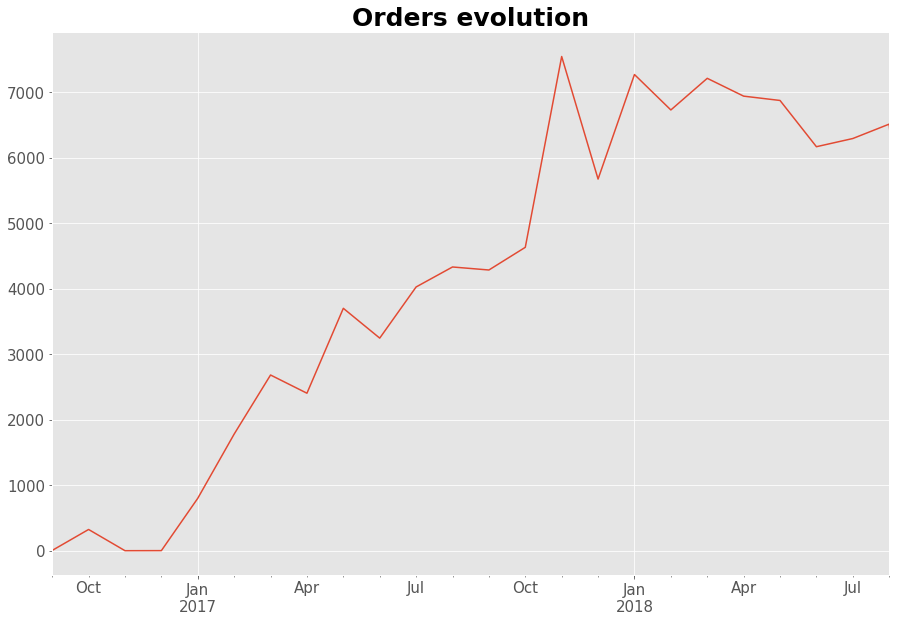

In [12]:
data['orders'].order_purchase_timestamp = pd.to_datetime(data['orders'].order_purchase_timestamp)
data['orders'].set_index('order_purchase_timestamp').resample('M')["order_id"].count().plot()
plt.xlim(pd.Timestamp('2016-09-04'), pd.Timestamp('2018-08-17'))
plt.title('Orders evolution')
plt.xlabel('')
plt.show()

Rappelons que les données, les commandes, etc… ne sont pas figées dans le temps. Dans le cadre d'un contrat de maintenance, il est nécessaire **d'évaluer la fréquence à laquelle la segmentation doit être mise à jour.**

In [13]:
data['orders']['order_purchase_timestamp'].describe()

count                   99441
unique                  98875
top       2018-03-31 15:08:21
freq                        3
first     2016-09-04 21:15:19
last      2018-10-17 17:30:18
Name: order_purchase_timestamp, dtype: object

**Une périodicité de 3 mois paraît être un choix pertinent**. Dans le contexte métier immédiat, il ne semble pas utile d'effectuer des mises à jour plus rapprochées. *A cela devra s'ajouter la stabilité de la modélisation.*

### Analyse du nombre de commandes par client
Sommes-nous sur une population de clients fidélisés avec des achats récurrents? Ou bien à l'opposé d'une stratégie communautaire avec un schéma de vente en One Shot?

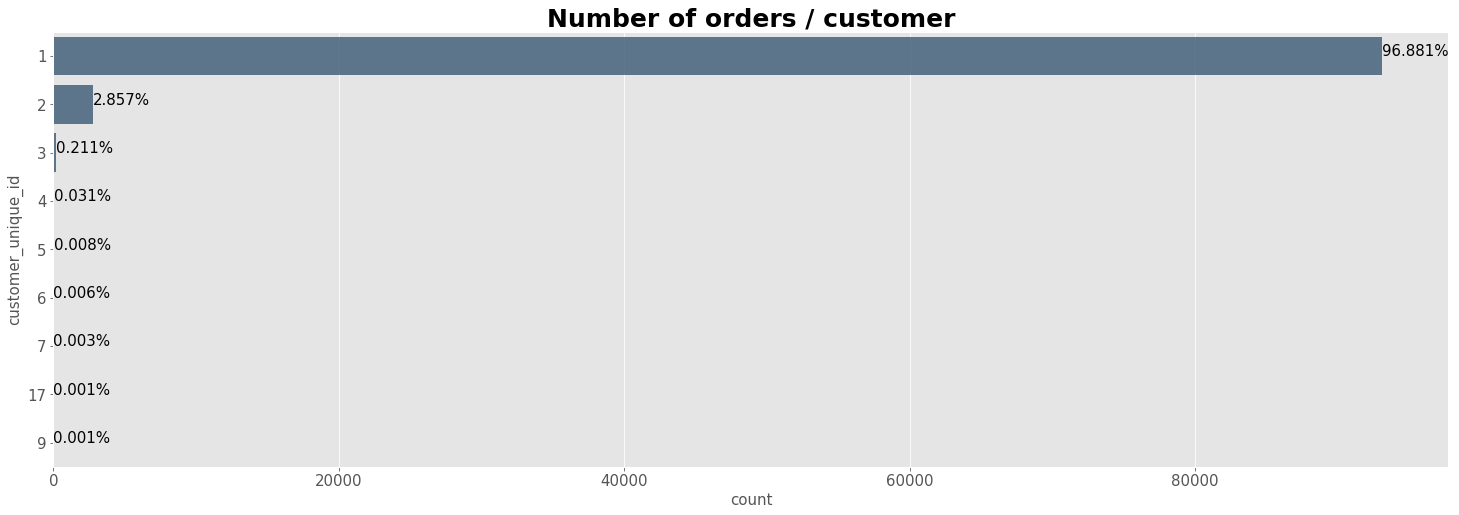

In [14]:
data_count = data['customers']['customer_unique_id'].value_counts().reset_index()

ax, fig = plt.subplots(figsize=(25,8)) 
ax = sns.countplot(data=data_count, y='customer_unique_id', color="#315a7d", alpha=.8, 
              order=data_count['customer_unique_id'].value_counts(ascending=False).index, orient='horizontal')
ax.set_title("Number of orders / customer")

for p in ax.patches:
            percentage = '{:.3f}%'.format(100 * p.get_width()/len(data_count['customer_unique_id']))
            x = p.get_x() + p.get_width()
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y), fontsize=15)
show()

**Le constat est simple, 97% des clients ont effectués un seul achat sur les deux années traitées.** \
L'axe de la fidélisation pourrait être optimisé pour obtenir un ROI plus élevé.

### Répartition des clients selon leur mode de paiement utilisé
Rappelons que l'activité est exploitée au Brésil, il se peut que les modes de paiement fréquemment utilisés soient différents de ceux connus en France. Voyons ce que nous pouvons comprendre des features paiements.

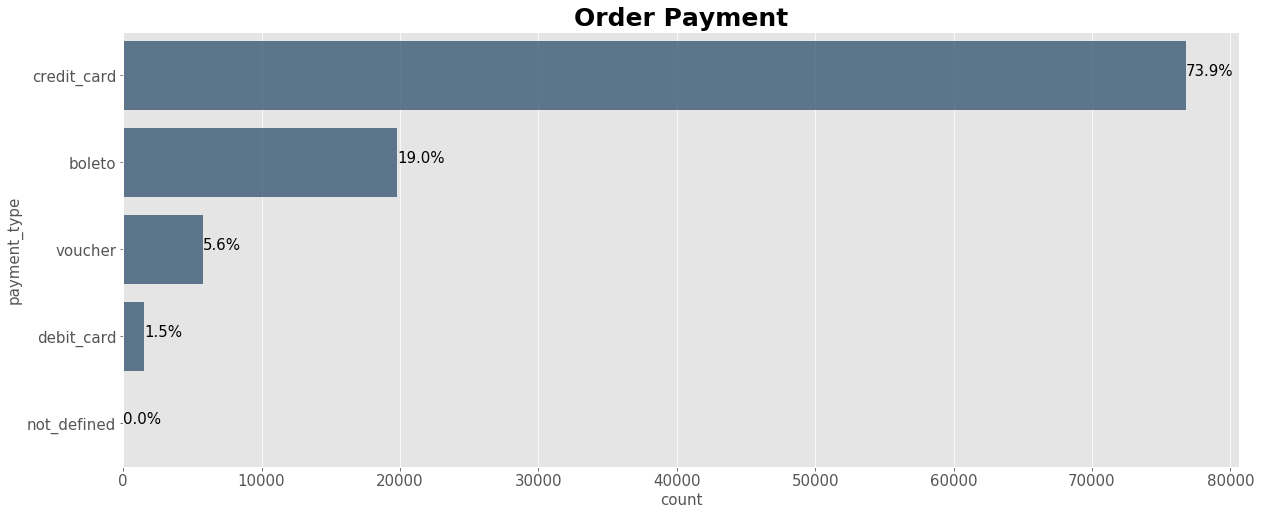

In [15]:
ax, fig = plt.subplots(figsize=(20,8)) 
ax = sns.countplot(data=data['order_payments'], y='payment_type', color="#315a7d", alpha=.8, 
              order=data['order_payments']['payment_type'].value_counts().index, orient='horizontal')
ax.set_title("Order Payment")

for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/len(data['order_payments']))
            x = p.get_x() + p.get_width()
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y), fontsize=15)
show()

"Boleto" est un moyen de paiement en espèces le plus populaire du Brésil. \
"Voucher" est une méthode de paiement prépayée simple.

### Répartition des statuts de commande
Dans le contexte de l'analyse, seules les commandes "valides" seront prises en compte. A exclure les annulées, refusées, etc… 

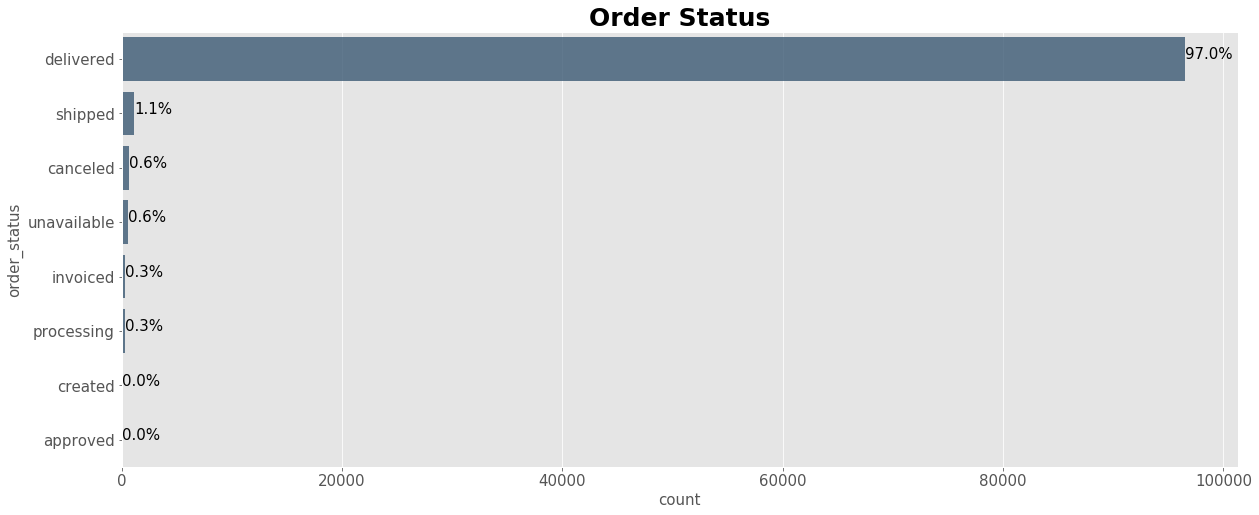

In [16]:
ax, fig = plt.subplots(figsize=(20,8)) 
ax = sns.countplot(data=data['orders'], y='order_status', color="#315a7d", alpha=.8, 
              order=data['orders']['order_status'].value_counts().index, orient='horizontal')
ax.set_title("Order Status")

for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/len(data['orders']))
            x = p.get_x() + p.get_width()
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y), fontsize=15)
show()

In [17]:
'''Exclusion des modalités canceled et unavailable'''
data['orders'] = data['orders'][data['orders']['order_status'] != 'canceled']
data['orders'] = data['orders'][data['orders']['order_status'] != 'unavailable']

### Répartition des clients selon leur localité (état) d'origine
Est-il nécessaire de prendre en compte toutes les localités? Tous les états?

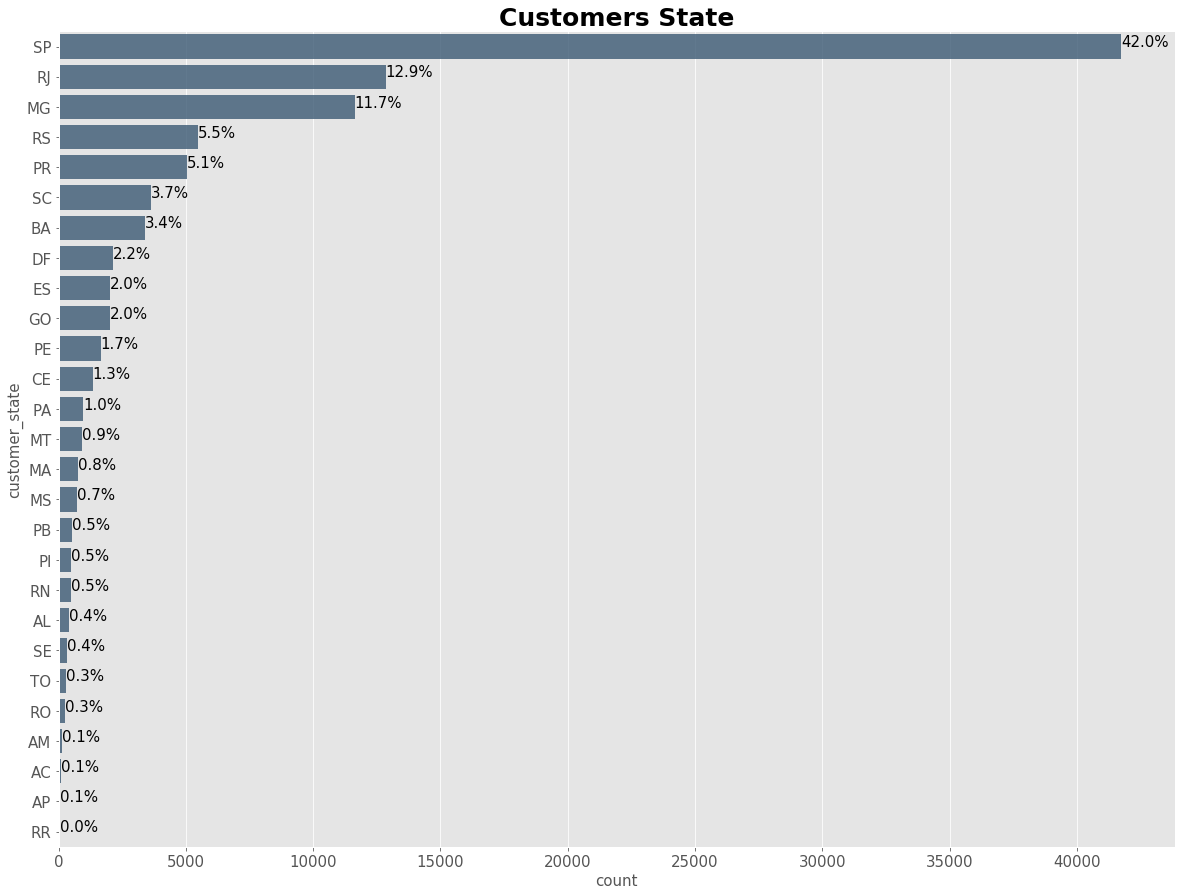

In [18]:
ax, fig = plt.subplots(figsize=(20,15)) 
ax = sns.countplot(data=data['customers'], y='customer_state', color="#315a7d", alpha=.8, 
              order=data['customers']['customer_state'].value_counts().index, orient='horizontal')
ax.set_title("Customers State")

for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/len(data['customers']))
            x = p.get_x() + p.get_width()
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y), fontsize=15)
show()

### Répartition des clients selon leur habitudes d'achat produit
Ici, l'objectif est d'obtenir une courte sélection de catégories produits les plus demandées. Comme l'atteste la ligne de code ci-dessous, la base de données répertorie un grand nombre de catégories, voyons si cette classification à forte granularité est pertinente ou pas. 

In [19]:
data['product_category'].product_category_name_english.nunique()

71

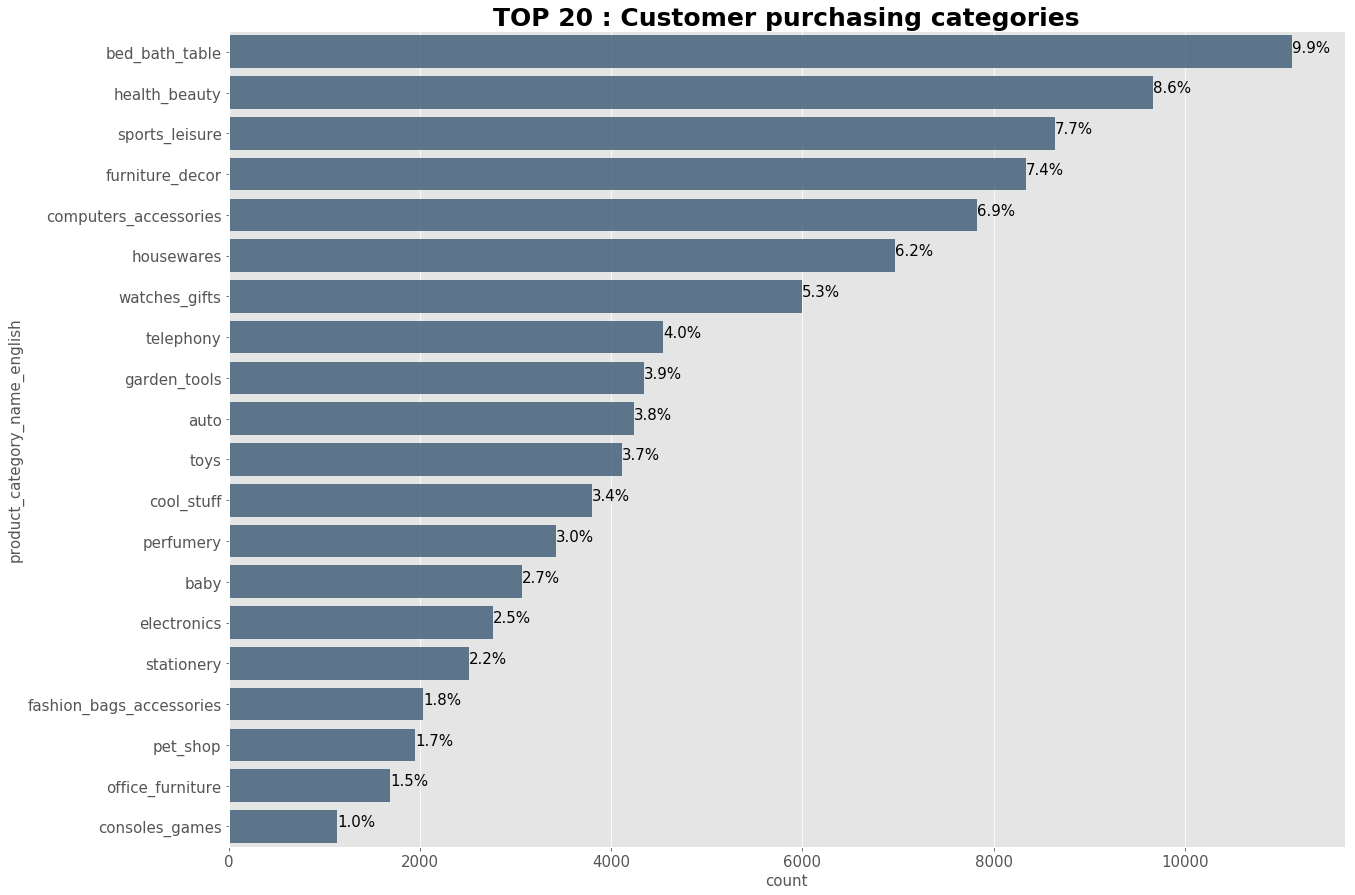

In [20]:
customers_products = pd.merge(data['orders_items'], data['products'], on='product_id', how='left')
customers_category = pd.merge(customers_products, data['product_category'], on='product_category_name', how='left')

ax, fig = plt.subplots(figsize=(20,15)) 
ax = sns.countplot(data=customers_category, y='product_category_name_english', color="#315a7d", alpha=.8, 
              order=customers_category['product_category_name_english'].value_counts().index[:20], orient='horizontal')
ax.set_title("TOP 20 : Customer purchasing categories")

for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/len(customers_category))
            x = p.get_x() + p.get_width()
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y), fontsize=15)
show()

La connaissance du client recherchée dans le contexte n'implique pas un ciblage de précision comme l'indique les catégories enfants de la base de données. Si l'objectif avait été l'optimisation du SEO pourquoi pas travailler un ciblage via une segmentation de second niveau (enfants), le contexte de l'étude menée incite à se positionner sur un niveau de catégories mères que nous n'avons pas à disposition. Voyons comment estimer ces catégories...

In [21]:
data['product_category']['product_category_name_english'].replace({
       'housewares':'appliances', 'perfumery':'health_beauty', 'pet_shop':'pets', 'stationery':'office',
       'furniture_decor':'home', 'office_furniture':'office', 'garden_tools':'garden', 
       'computers_accessories':'electronics', 'bed_bath_table':'home', 'telephony':'electronics', 
       'construction_tools_construction':'construction', 'baby':'health_beauty', 'cool_stuff':'others', 
       'watches_gifts':'fashion', 'air_conditioning':'construction', 'books_general_interest':'culture',
       'small_appliances':'appliances', 'luggage_accessories':'sports_leisure', 'fashion_underwear_beach':'fashion', 
       'christmas_supplies':'home', 'fashion_bags_accessories':'fashion', 'musical_instruments':'hobbies',
       'construction_tools_lights':'construction', 'books_technical':'culture', 'market_place':'others',
       'costruction_tools_garden':'construction', 'home_appliances':'home', 'security_and_services':'office',
       'agro_industry_and_commerce':'office', 'party_supplies':'hobbies', 'home_confort':'home',
       'cds_dvds_musicals':'culture', 'industry_commerce_and_business':'office', 'consoles_games':'electronics', 
       'furniture_bedroom':'home', 'construction_tools_safety':'construction', 'fixed_telephony':'electronics', 
       'drinks':'food', 'kitchen_dining_laundry_garden_furniture':'home', 'fashion_shoes':'fashion',
       'home_construction':'construction', 'audio':'electronics', 'home_appliances_2':'home',
       'fashion_male_clothing':'fashion', 'cine_photo':'culture', 'furniture_living_room':'home',
       'art':'culture', 'food_drink':'food', 'tablets_printing_image':'electronics', 'fashion_sport':'fashion',
       'la_cuisine':'home', 'flowers':'garden', 'computers':'electronics', 'home_comfort_2':'home',
       'small_appliances_home_oven_and_coffee':'appliances', 'dvds_blu_ray':'culture', 'music':'culture',
       'costruction_tools_tools':'construction', 'fashio_female_clothing':'fashion',
       'furniture_mattress_and_upholstery':'home', 'signaling_and_security':'office',
       'diapers_and_hygiene':'health_beauty', 'books_imported':'culture', 'arts_and_craftmanship':'culture',
       'fashion_childrens_clothes':'fashion'}, inplace=True)

## Enrichissement de l'échantillons par la création de features 

### `KPI Conversion`
Les indicateurs de conversion permettront d'avoir une idée plus précise de la performance exploitée par le client. Ici, il est question de pouvoir quantifier le "lien" entre l'acheteur et le produit, avec des indicateurs classiques de panier moyen, montant total dépensé, du nombre de commande, etc… en passant par une segmentation de la base client selon des tranches de dépenses effectuées entre 2016 et 2018.

In [22]:
%%time
#Average basket
orders_orders_items = pd.merge(data['orders'], data['orders_items'], 
                                        on='order_id', how='left')

average_basket = pd.merge(orders_orders_items, data['customers'], on='customer_id', how='left')
average_basket = average_basket.groupby('customer_unique_id')['price'].mean()
average_basket.name = 'average_basket'

#Total amount 
customers_orders = pd.merge(orders_orders_items, data['customers'],
                                        on='customer_id', how='left')
customers_orders.drop_duplicates(subset=['customer_unique_id'], inplace=True) #

customers_orders['total_spent'] = customers_orders['price'] + customers_orders['freight_value']
total_spent = customers_orders.groupby('customer_unique_id')['total_spent'].sum()
total_spent.name = 'total_spent'

#Split customer spending according to the quantiles of the 'total_spent' variable
quartile_25 = customers_orders['total_spent'].quantile(0.25)
quartile_50 = customers_orders['total_spent'].quantile(0.50)
quartile_75 = customers_orders['total_spent'].quantile(0.75)

#Quartile < 25%
customers_orders['bucket_quartile_lower25'] = np.where(customers_orders['total_spent'] < quartile_25, 1, 0)

#Quartile 25 à 50%
customers_orders['bucket_quartile_25_50'] = np.where(
    (customers_orders['total_spent'] >= quartile_25) & (customers_orders['total_spent'] < quartile_50), 1, 0)

#Quartile 50 à 75%
customers_orders['bucket_quartile_50_75'] = np.where(
    (customers_orders['total_spent'] >= quartile_50) & (customers_orders['total_spent'] < quartile_75), 1, 0)
    
#Quartile > 75%
customers_orders['bucket_quartile_upper75'] = np.where(customers_orders['total_spent'] > quartile_75, 1, 0)

buckets_table = customers_orders[['customer_unique_id', 'bucket_quartile_lower25', 'bucket_quartile_25_50', 
                  'bucket_quartile_50_75', 'bucket_quartile_upper75']].groupby('customer_unique_id').mean()


#Max Amount of an order (except fdp)
max_order_amount = customers_orders.groupby('customer_unique_id')['price'].max()
max_order_amount.name = 'max_order_amount'

#Min Amount of an order (except fdp)
min_order_amount = customers_orders.groupby('customer_unique_id')['price'].min()
min_order_amount.name = 'min_order_amount'

#Number of products purchased
number_of_products_purchased = pd.merge(customers_orders, data['products'], on='product_id', 
           how='left').groupby('customer_unique_id')['product_id'].count()
number_of_products_purchased.name = 'number_of_products_purchased'


#Best categ.
customers_products = pd.merge(customers_orders, data['products'], on='product_id', how='left')
customers_category = pd.merge(customers_products, data['product_category'], on='product_category_name', how='left')

category_type_table = pd.pivot_table(customers_category, index='customer_unique_id', 
                                    columns='product_category_name_english', values='price', 
                                    aggfunc='sum', fill_value=0)


#Payment method
payment_type = pd.merge(data['order_payments'], customers_orders, on='order_id', how='left')
payment_type_table = pd.pivot_table(payment_type, index='customer_unique_id', 
                                    columns='payment_type', values='order_id', 
                                    aggfunc='count', fill_value=0)

payment_type_table.columns = ['payment_boleto', 'payment_credit_card', 'payment_debit_card', 'payment_voucher']

CPU times: user 2.83 s, sys: 200 ms, total: 3.03 s
Wall time: 3.04 s


In [23]:
features = [average_basket, total_spent, max_order_amount, min_order_amount, 
            number_of_products_purchased]
sample_conversion = pd.DataFrame(data=features).T.reset_index()
sample_conversion = pd.merge(sample_conversion, buckets_table, on='customer_unique_id', how='left')
sample_conversion = pd.merge(sample_conversion, payment_type_table, on='customer_unique_id', how='left')
sample_conversion = pd.merge(sample_conversion, category_type_table, on='customer_unique_id', how='left')
sample_conversion

,customer_unique_id,average_basket,total_spent,max_order_amount,min_order_amount,number_of_products_purchased,bucket_quartile_lower25,bucket_quartile_25_50,bucket_quartile_50_75,bucket_quartile_upper75,payment_boleto,payment_credit_card,payment_debit_card,payment_voucher,appliances,auto,construction,culture,electronics,fashion,food,garden,health_beauty,hobbies,home,office,others,pets,sports_leisure,toys
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,141.90,129.90,129.90,1.0,0,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,129.9,0.0,0.0,0.0,0.0,0.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,27.19,18.90,18.90,1.0,1,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,18.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0000f46a3911fa3c0805444483337064,69.00,86.22,69.00,69.00,1.0,0,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,69.0,0.0,0.0,0.0,0.0
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,43.62,25.99,25.99,1.0,1,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,25.99,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0004aac84e0df4da2b147fca70cf8255,180.00,196.89,180.00,180.00,1.0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,180.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94985,fffcf5a5ff07b0908bd4e2dbc735a684,785.00,1148.28,890.00,890.00,1.0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,890.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94986,fffea47cd6d3cc0a88bd621562a9d061,64.89,84.58,64.89,64.89,1.0,0,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,64.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94987,ffff371b4d645b6ecea244b27531430a,89.90,112.46,89.90,89.90,1.0,0,0,1,0,0.0,1.0,0.0,0.0,0.0,89.9,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94988,ffff5962728ec6157033ef9805bacc48,115.00,133.69,115.00,115.00,1.0,0,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,115.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
sample_conversion.duplicated(subset='customer_unique_id').sum()

0

### `KPI Rétention / Fidélité`
Une fois l'aspect purement business traité, il est indispensable d'en savoir plus sur le degré de fidélisation du client. Ici, cette mécanique peut-être étudiée par l'implémentation d'indicateurs de fréquence d'achat, de participation aux avis produits, etc…

In [25]:
#Number of days since last purchase
#Base time Timestamp('2018-10-17 17:30:18')
customers_total_orders = pd.merge(data['customers'], orders_orders_items, 
                                        on='customer_id', how='left')
customers_total_orders['order_purchase_timestamp'] = pd.to_datetime(customers_total_orders['order_purchase_timestamp'])

customers_total_orders['order_purchase_timestamp'] = pd.to_datetime(customers_total_orders['order_purchase_timestamp'])
last_time_order = customers_total_orders['order_purchase_timestamp'].max() - customers_total_orders['order_purchase_timestamp']
last_time_order = last_time_order.apply(lambda x: x.days)
customers_total_orders['last_time_order'] = last_time_order

#Purchase frequency over 365 according to the 3 years 2016, 17 et 18
customers_total_orders['order_year'] = pd.DatetimeIndex(customers_total_orders['order_purchase_timestamp']).to_period('Y')

frequency_purchase_year = pd.pivot_table(customers_total_orders, index='customer_unique_id', 
                                         columns='order_year', values='order_id', 
                                         aggfunc='count', fill_value=0)

frequency_purchase_year.columns=['frequency_purchase_2016', 
                                 'frequency_purchase_2017',
                                 'frequency_purchase_2018']

frequency_purchase_year['frequency_purchase_total'] = frequency_purchase_year['frequency_purchase_2016'] + \
                                                      frequency_purchase_year['frequency_purchase_2017'] + \
                                                      frequency_purchase_year['frequency_purchase_2018']
frequency_purchase_year.reset_index(inplace=True)


last_time_order = pd.merge(frequency_purchase_year, customers_total_orders, 
                           on= 'customer_unique_id', how='left').groupby('customer_unique_id')['last_time_order'].sum()

frequency_purchase = frequency_purchase_year.set_index('customer_unique_id')['frequency_purchase_total']
frequency_purchase.name = 'frequency_purchase'


#Comments on the number
data['order_reviews']['comment_review'] = data['order_reviews']['review_comment_message'].apply(
    lambda x: 1 if not pd.isnull(x) else 0)

number_review_comment = pd.merge(customers_orders, data['order_reviews'], 
                                  on='order_id', how='left').groupby('customer_unique_id')['review_score'].sum()
number_review_comment.name = 'number_review_comment'

In [26]:
features = [last_time_order, frequency_purchase, number_review_comment]
sample_recency = pd.DataFrame(data=features).T.reset_index()
sample_recency

,customer_unique_id,last_time_order,frequency_purchase,number_review_comment
0,0000366f3b9a7992bf8c76cfdf3221e2,115.0,1.0,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118.0,1.0,4.0
2,0000f46a3911fa3c0805444483337064,541.0,1.0,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,325.0,1.0,4.0
4,0004aac84e0df4da2b147fca70cf8255,292.0,1.0,5.0
...,...,...,...,...
94985,fffcf5a5ff07b0908bd4e2dbc735a684,902.0,2.0,5.0
94986,fffea47cd6d3cc0a88bd621562a9d061,266.0,1.0,4.0
94987,ffff371b4d645b6ecea244b27531430a,572.0,1.0,5.0
94988,ffff5962728ec6157033ef9805bacc48,123.0,1.0,5.0


In [27]:
sample_recency.duplicated(subset='customer_unique_id').sum()

0

### `KPI Géographique`
Un dernier axe peut-être ajouté à l'analyse client, c'est la notion du lieu de résidence (ou de consommation) du produit. Le client peut-être mieux représenté dans certaines régions du Brésil, on peut facilement imaginer une opération de Street Marketing selon une localisation géographique de ville ou de région .

In [28]:
data['geolocation'].geolocation_city.nunique()

8011

In [29]:
data['geolocation'].geolocation_city.value_counts() / len(data['geolocation'])*100

sao paulo                   13.577787
rio de janeiro               6.214087
belo horizonte               2.780047
são paulo                    2.491394
curitiba                     1.659030
                              ...    
galiléia                     0.000100
santa luzia de caratinga     0.000100
ipuca                        0.000100
nova brasilandia doeste      0.000100
poço verde                   0.000100
Name: geolocation_city, Length: 8011, dtype: float64

In [30]:
data['geolocation'].geolocation_state.nunique()

27

In [31]:
data['geolocation'].geolocation_state.value_counts() / len(data['geolocation'])*100

SP    40.420212
MG    12.631541
RJ    12.114925
RS     6.184092
PR     5.784957
SC     3.832175
BA     3.603913
GO     2.013572
ES     1.674527
PE     1.642932
DF     1.298388
MT     1.202904
CE     1.167210
PA     1.085123
MS     1.042930
MA     0.785172
PB     0.553710
RN     0.504018
PI     0.454826
AL     0.418232
TO     0.357542
SE     0.356242
RO     0.347743
AM     0.243160
AC     0.130079
AP     0.085286
RR     0.064589
Name: geolocation_state, dtype: float64

Le contexte métier de l'e-commerce n'est pas des plus sensibles aux facteurs géographiques. La prise en compte d'une granularité fine propre aux villes n'est pas retenue. Le choix de géolocaliser les individus selon leur état d'origine est priviligié.

In [32]:
sample_locality = data['customers'][['customer_unique_id', 'customer_state']]
sample_locality

,customer_unique_id,customer_state
0,861eff4711a542e4b93843c6dd7febb0,SP
1,290c77bc529b7ac935b93aa66c333dc3,SP
2,060e732b5b29e8181a18229c7b0b2b5e,SP
3,259dac757896d24d7702b9acbbff3f3c,SP
4,345ecd01c38d18a9036ed96c73b8d066,SP
...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,SP
99437,d52a67c98be1cf6a5c84435bd38d095d,SP
99438,e9f50caf99f032f0bf3c55141f019d99,CE
99439,73c2643a0a458b49f58cea58833b192e,RS


In [33]:
state = ['SP', 'MG', 'RJ', 'RS', 'PR']
for x in sample_locality['customer_state']: 
    if x not in state : 
        sample_locality['customer_state'].replace(x, 'other', inplace=True)
    

Notons que cette étape n'est pas indispensable pour le moment, mais dans une logique de modélisation l'encodage de l'ensemble des états va inévitablement alourdir l'implémentation du nombre de features. Ici, dans le contexte que nous connaissons, il n'est pas pertinent de conserver cette granularité de géolocalisation.

In [34]:
olistbr = pd.merge(sample_conversion, sample_recency, on='customer_unique_id', how='inner')
olistbr = pd.merge(olistbr, sample_locality, on='customer_unique_id', how='inner')
olistbr.drop_duplicates(subset=['customer_unique_id'], inplace=True)
olistbr.dropna(inplace=True)
olistbr.set_index('customer_unique_id', inplace=True)
olistbr

,average_basket,total_spent,max_order_amount,min_order_amount,number_of_products_purchased,bucket_quartile_lower25,bucket_quartile_25_50,bucket_quartile_50_75,bucket_quartile_upper75,payment_boleto,payment_credit_card,payment_debit_card,payment_voucher,appliances,auto,construction,culture,electronics,fashion,food,garden,health_beauty,hobbies,home,office,others,pets,sports_leisure,toys,last_time_order,frequency_purchase,number_review_comment,customer_state
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,129.90,141.90,129.90,129.90,1.0,0,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,129.9,0.0,0.0,0.0,0.0,0.0,115.0,1.0,5.0,SP
0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,27.19,18.90,18.90,1.0,1,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,18.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118.0,1.0,4.0,SP
0000f46a3911fa3c0805444483337064,69.00,86.22,69.00,69.00,1.0,0,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,69.0,0.0,0.0,0.0,0.0,541.0,1.0,3.0,other
0000f6ccb0745a6a4b88665a16c9f078,25.99,43.62,25.99,25.99,1.0,1,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,25.99,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,325.0,1.0,4.0,other
0004aac84e0df4da2b147fca70cf8255,180.00,196.89,180.00,180.00,1.0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,180.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,292.0,1.0,5.0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,785.00,1148.28,890.00,890.00,1.0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,890.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,902.0,2.0,5.0,other
fffea47cd6d3cc0a88bd621562a9d061,64.89,84.58,64.89,64.89,1.0,0,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,64.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,266.0,1.0,4.0,other
ffff371b4d645b6ecea244b27531430a,89.90,112.46,89.90,89.90,1.0,0,0,1,0,0.0,1.0,0.0,0.0,0.0,89.9,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,572.0,1.0,5.0,other


In [35]:
olistbr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93605 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 33 columns):
average_basket                  93605 non-null float64
total_spent                     93605 non-null float64
max_order_amount                93605 non-null float64
min_order_amount                93605 non-null float64
number_of_products_purchased    93605 non-null float64
bucket_quartile_lower25         93605 non-null int64
bucket_quartile_25_50           93605 non-null int64
bucket_quartile_50_75           93605 non-null int64
bucket_quartile_upper75         93605 non-null int64
payment_boleto                  93605 non-null float64
payment_credit_card             93605 non-null float64
payment_debit_card              93605 non-null float64
payment_voucher                 93605 non-null float64
appliances                      93605 non-null float64
auto                            93605 non-null float64
construction         

In [36]:
olistbr.describe()

,average_basket,total_spent,max_order_amount,min_order_amount,number_of_products_purchased,bucket_quartile_lower25,bucket_quartile_25_50,bucket_quartile_50_75,bucket_quartile_upper75,payment_boleto,payment_credit_card,payment_debit_card,payment_voucher,appliances,auto,construction,culture,electronics,fashion,food,garden,health_beauty,hobbies,home,office,others,pets,sports_leisure,toys,last_time_order,frequency_purchase,number_review_comment
count,93605.000000,93605.000000,93605.000000,93605.000000,93605.0,93605.000000,93605.000000,93605.000000,93605.000000,93605.000000,93605.000000,93605.000000,93605.000000,93605.000000,93605.000000,93605.000000,93605.000000,93605.000000,93605.000000,93605.000000,93605.000000,93605.000000,93605.000000,93605.000000,93605.000000,93605.000000,93605.000000,93605.000000,93605.000000,93605.000000,93605.000000,93605.000000
mean,126.335502,146.718385,126.442726,126.442726,1.0,0.249239,0.251076,0.248993,0.250638,0.199263,0.773025,0.015448,0.056087,8.113874,5.714106,3.620372,1.134748,17.331229,14.014532,0.579879,4.466273,20.477753,1.960235,19.094991,5.752476,6.626224,2.029575,10.724748,4.801710,287.769136,1.180332,4.113904
std,190.492372,198.467519,191.173504,191.173504,0.0,0.432575,0.433635,0.432432,0.433383,0.399448,0.425885,0.123413,0.410192,65.948217,51.705677,42.154614,25.940659,95.130647,81.488114,8.182706,48.282946,84.971426,44.194442,66.710306,41.910503,49.267155,25.146176,60.103554,35.851016,251.557666,0.620849,1.355080
min,0.850000,6.080000,0.850000,0.850000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000
25%,42.950000,57.600000,42.000000,42.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,127.000000,1.000000,4.000000
50%,79.000000,96.320000,79.000000,79.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,1.000000,5.000000
75%,139.900000,163.580000,139.900000,139.900000,1.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,391.000000,1.000000,5.000000
max,6735.000000,6929.310000,6735.000000,6735.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,29.000000,6735.000000,2258.000000,3099.900000,6499.000000,6729.000000,3999.900000,699.900000,3930.000000,3899.000000,4399.870000,2350.000000,3089.000000,3109.990000,2498.000000,4059.000000,1699.990000,8700.000000,24.000000,13.000000


### Analyse des valeurs outliers
Vérification des montants de paiement les plus élevés. Aucun montant absurde dans le sens où un chiffre négatif ne serait pas possible, mais des montants assez élevés sont enregistrés. 

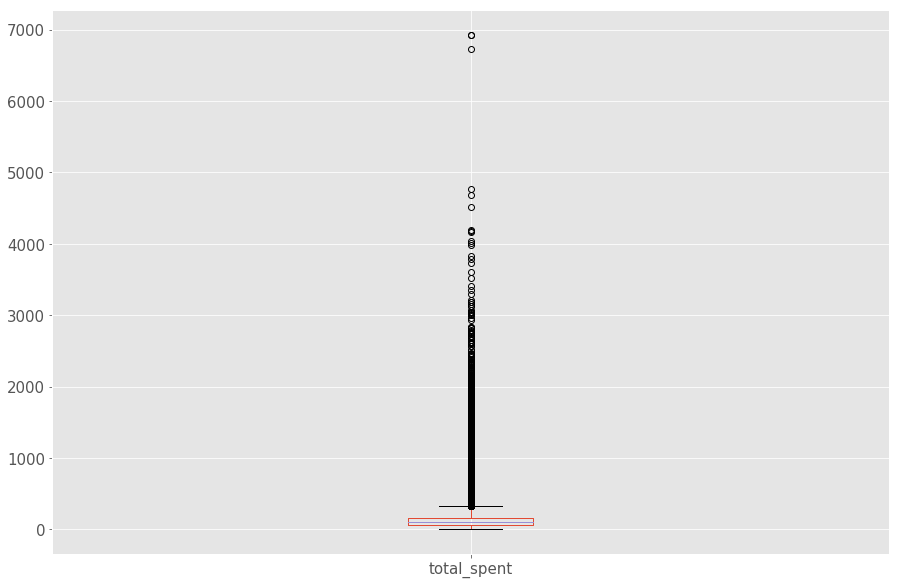

In [37]:
olistbr.total_spent.plot(kind='box')
show()

In [38]:
olistbr.max_order_amount.mean()

126.44272560238178

In [39]:
olistbr.max_order_amount.std()

191.17350443650295

In [40]:
olistbr.sort_values('total_spent', ascending=False)[:10]

,average_basket,total_spent,max_order_amount,min_order_amount,number_of_products_purchased,bucket_quartile_lower25,bucket_quartile_25_50,bucket_quartile_50_75,bucket_quartile_upper75,payment_boleto,payment_credit_card,payment_debit_card,payment_voucher,appliances,auto,construction,culture,electronics,fashion,food,garden,health_beauty,hobbies,home,office,others,pets,sports_leisure,toys,last_time_order,frequency_purchase,number_review_comment,customer_state
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
dc4802a71eae9be1dd28f5d788ceb526,6735.00,6929.31,6735.00,6735.00,1.0,0,0,0,1,0.0,1.0,0.0,0.0,6735.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,567.0,1.0,5.0,other
459bef486812aa25204be022145caa62,6729.00,6922.21,6729.00,6729.00,1.0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6729.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,39.0,1.0,1.0,other
ff4159b92c40ebe40454e3e6a7c35ed6,6499.00,6726.66,6499.00,6499.00,1.0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6499.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,466.0,1.0,5.0,SP
eebb5dda148d3893cdaf5b5ca3040ccb,4690.00,4764.34,4690.00,4690.00,1.0,0,0,0,1,0.0,1.0,0.0,0.0,4690.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,502.0,1.0,4.0,SP
48e1ac109decbb87765a3eade6854098,4590.00,4681.78,4590.00,4590.00,1.0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4590.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,72.0,1.0,5.0,other
edde2314c6c30e864a128ac95d6b2112,4399.87,4513.32,4399.87,4399.87,1.0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,4399.87,0.0,0.0,0.0,0.0,0.0,0.0,30.0,1.0,5.0,SP
edf81e1f3070b9dac83ec83dacdbb9bc,3999.00,4194.76,3999.00,3999.00,1.0,0,0,0,1,0.0,2.0,0.0,0.0,3999.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,502.0,1.0,2.0,other
fa562ef24d41361e476e748681810e1e,4099.99,4175.26,4099.99,4099.99,1.0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4099.99,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,157.0,1.0,5.0,MG
ca27f3dac28fb1063faddd424c9d95fa,4059.00,4163.51,4059.00,4059.00,1.0,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,4059.0,0.0,36.0,1.0,4.0,MG


In [41]:
outliers = customers_products.sort_values('price', ascending=False)[['price', 'product_category_name']][:10]
outliers = pd.merge(outliers, data['product_category'], on = 'product_category_name').sort_values('price')
outliers

,price,product_category_name,product_category_name_english
5,3999.00,eletroportateis,appliances
9,3999.90,relogios_presentes,fashion
8,4059.00,esporte_lazer,sports_leisure
7,4099.99,consoles_games,electronics
6,4399.87,instrumentos_musicais,hobbies
2,4590.00,pcs,electronics
4,4690.00,eletroportateis,appliances
3,6499.00,artes,culture
1,6729.00,pcs,electronics
0,6735.00,utilidades_domesticas,appliances


Notons qu'il n'y a pas d'incohérence entre les prix élevés et le type de produits. Il est tout à fait possible que ces produits aient des prix élevés…

L'activité est exploitée uniquement au Brésil, et il n'est pas précisé dans quelle monnaie nous sommes. Normalement en Réal brésilien, pour information 6735 Réal brésilien est égale à 1296,84 Dollar américain (Taux de change de 12/2020) donc le Top-Price ci-dessus n'est pas absurde.\
L'échantillon peut être maintenu ainsi.

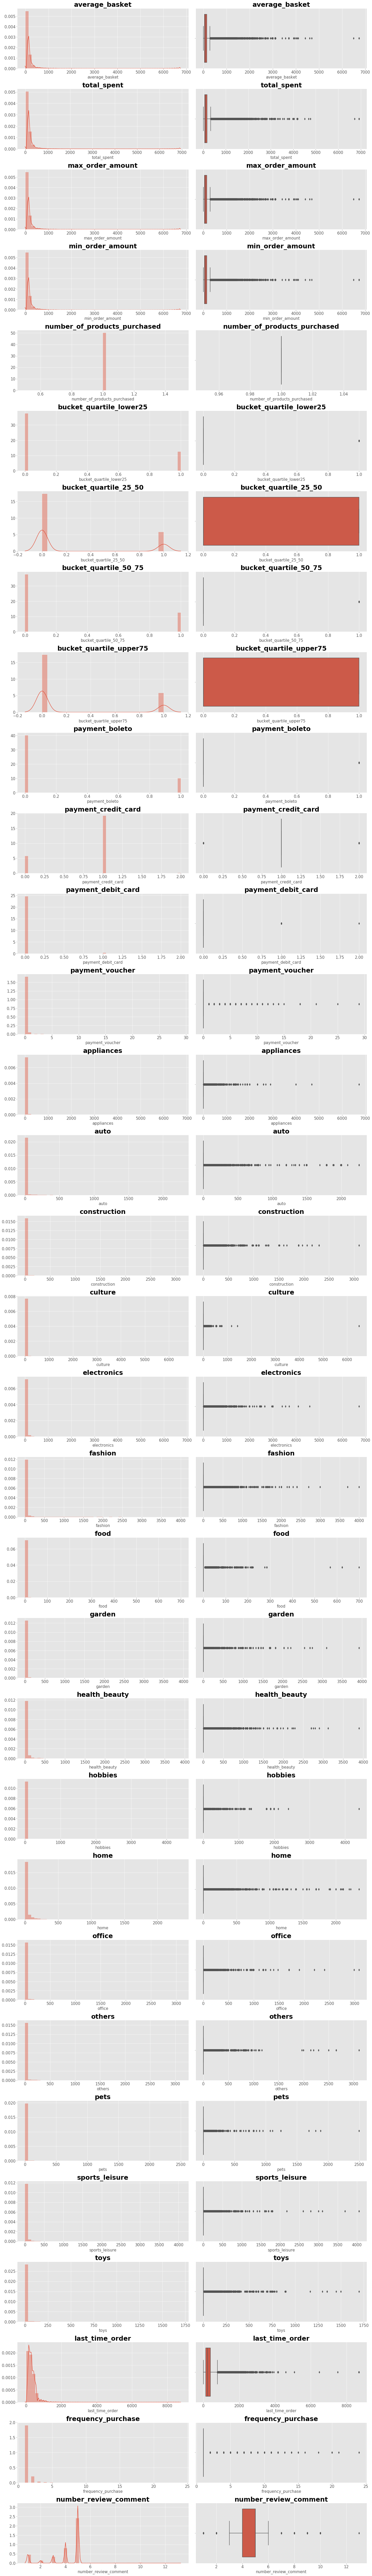

In [46]:
plt.figure(figsize=(20,150))
i=1
for var in olistbr.columns:
    if olistbr[var].dtypes != "object":
        plt.subplot(35,2,i)
        sns.distplot(olistbr[var])
        plt.title(var)
        i+=1

        plt.subplot(35,2,i)
        sns.boxplot(olistbr[var])
        plt.title(var)
        plt.tight_layout()
        i+=1

show()

Variables asymétriques propres à l'activité avec de larges queues de distribution. Une problématique d'échelle est à prendre en compte pour les tests de modélisation.

In [49]:
olistbr.to_csv('p5_00_dataset/olistbr.csv', sep=';', encoding='utf-8')